In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import qiskit
%matplotlib inline

In [3]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3,'q')

In [4]:
# Create a Quantum Circuit acting on the q register
A_circ = QuantumCircuit(q)

In [5]:
A_circ.draw()

In [6]:
A_circ.h(q[0])
A_circ.x(q[1])
A_circ.barrier(q)

In [7]:
A_circ.draw()

In [8]:
c = ClassicalRegister(3,'c')

In [9]:
B_circ = QuantumCircuit(q,c)
B_circ.h(q[0])
B_circ.h(q[2])
B_circ.measure(q,c)
qc = A_circ + B_circ
qc.draw()

In [10]:
from qiskit import IBMQ

In [11]:
api_token = ''
IBMQ.enable_account(api_token)

In [12]:
backend_list = IBMQ.backends()
print(backend_list)

[<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]


In [13]:
backend_sim = IBMQ.get_backend('ibmq_qasm_simulator')

In [14]:
job_sim = qiskit.execute(qc, backend_sim, shots=1024)

In [18]:
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'010': 520, '110': 504}


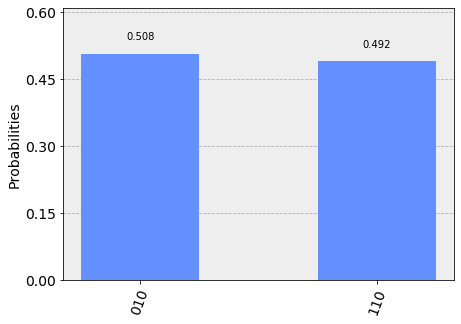

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [20]:
job2 = qiskit.execute(qc, backend_sim, shots=1024, memory=True)
result2 = job2.result()
list = result2.get_memory(qc)
print(list[0])

010
